In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)



### Finished Objectives
Filter the patients using a series of criteria:​

Those who have received opioid prescriptions​

\+ Those who are not cancer patients​

\+ Those who have experienced opioid pain ​

Returned 369 patients in all 20 sample files in CMS​

Get 30 (600 total) random samples from the original CMS dataset. ​

Total runtime around 12 minutes.​

Saved these in separate respective folders, so no need to run it again for now​

​

### Current Objective
Given the CMS dataset, get the significant features from the patients prescribed with opioids and experienced opioid related harm.​

### inp_op and others: collection of patients that experienced opioid harm and prescribed opioids

In [2]:
inp_op = pd.read_csv('./../datasets/cms_processed_full/inpatient_final1.csv')
outp_op = pd.read_csv('./../datasets/cms_processed_full/outpatient_final1.csv')
summ_op = pd.read_csv('./../datasets/cms_processed_full/summary_final1.csv')
presc_op = pd.read_csv('./../datasets/cms_processed_full/prescription_final1.csv')
for i in range(2,21):
    inp_op =inp_op.append(pd.read_csv('./../datasets/cms_processed_full/inpatient_final'+str(i)+'.csv'))
    outp_op =outp_op.append(pd.read_csv('./../datasets/cms_processed_full/outpatient_final'+str(i)+'.csv'))
    summ_op =summ_op.append(pd.read_csv('./../datasets/cms_processed_full/summary_final'+str(i)+'.csv'))
    presc_op =presc_op.append(pd.read_csv('./../datasets/cms_processed_full/prescription_final'+str(i)+'.csv'))
unif_op = inp_op.append(outp_op).reset_index(drop=True)

/tmp/ipykernel_20434/963198832.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inp_op =inp_op.append(pd.read_csv('./../datasets/cms_processed_full/inpatient_final'+str(i)+'.csv'))
/tmp/ipykernel_20434/963198832.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outp_op =outp_op.append(pd.read_csv('./../datasets/cms_processed_full/outpatient_final'+str(i)+'.csv'))
/tmp/ipykernel_20434/963198832.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summ_op =summ_op.append(pd.read_csv('./../datasets/cms_processed_full/summary_final'+str(i)+'.csv'))
/tmp/ipykernel_20434/963198832.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  presc_

In [3]:
summ_op
# columns to use from Summary file:
    # convert birth dt to age 
    # sex, race,
    # bene_hi_cvrage (continuous)
        # same normalization as below
    # recode 1,2 coding as 2= 0
    # comorbidity (sp_alzhdmta....strekia)
    # 
    # money reimbursement/payment columns(medreimb_ip....ppymp_car)
        # sum up these columsn to make new column -> - mean (of new col) / divide by standard dev.
    

# sklearn, for logistic regression model 
# use the summary file for now, add icd later once it gets working.

# https://www.statsmodels.org/dev/index.html

# set up github repo
    # add prof. shi, prof helm
    # document the work done to process dataset to create data pipeline
    # 

,Unnamed: 0,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,0,3951A55F8A5682D3,19631201,NaN,1,1,0,16,770,12,12,0,12,1,2,2,1,2,1,2,2,2,2,2,0.0,0.0,0.0,100.0,20.0,0.0,650.0,250.0,20.0
1,1,39898ACF8B8DF7BB,19110501,NaN,2,1,0,23,370,12,12,0,12,2,2,2,2,2,1,2,1,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,530.0,160.0,0.0
2,2,7C7CF7C730043552,19760601,NaN,2,1,0,33,660,3,3,0,3,2,1,2,2,2,2,2,2,1,2,2,0.0,0.0,0.0,0.0,0.0,0.0,350.0,80.0,0.0
3,3,800C1A2D55B31C97,19380301,NaN,2,3,0,43,490,12,12,0,12,1,1,2,2,2,1,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,500.0,130.0,0.0
4,4,804A02EA8F3AEF6B,19610101,NaN,1,1,0,39,290,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,730.0,160.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,17,AA709202F79B0437,19330801,NaN,1,1,0,44,120,12,12,0,12,2,1,2,2,2,1,1,1,1,1,2,0.0,0.0,0.0,200.0,30.0,0.0,1700.0,450.0,0.0
18,18,C19F7F93AA2C99EC,19320401,NaN,2,1,0,14,190,12,12,0,10,2,1,2,2,2,1,2,1,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,670.0,220.0,0.0
19,19,C1A97EB06B409A61,19310201,NaN,2,1,0,45,610,12,12,9,12,2,1,2,2,2,1,2,1,2,1,2,0.0,0.0,0.0,260.0,420.0,0.0,970.0,230.0,0.0
20,20,DB1183C366A70E78,19420201,NaN,1,1,0,36,80,12,12,0,12,1,1,1,2,1,1,1,1,1,2,2,21000.0,3072.0,0.0,1320.0,260.0,0.0,5770.0,1280.0,0.0


### the following is the random sample of 30 patients per sample file

In [4]:
inp_rand = pd.read_csv('./../datasets/cms_random/inpatient_final1.csv')
outp_rand = pd.read_csv('./../datasets/cms_random/outpatient_final1.csv')
summ_rand = pd.read_csv('./../datasets/cms_random/summary_final1.csv')
presc_rand = pd.read_csv('./../datasets/cms_random/prescription_final1.csv')
for i in range(2,21):
    inp_rand =inp_rand.append(pd.read_csv('./../datasets/cms_random/inpatient_final'+str(i)+'.csv'))
    outp_rand =outp_rand.append(pd.read_csv('./../datasets/cms_random/outpatient_final'+str(i)+'.csv'))
    summ_rand =summ_rand.append(pd.read_csv('./../datasets/cms_random/summary_final'+str(i)+'.csv'))
    presc_rand =presc_rand.append(pd.read_csv('./../datasets/cms_random/prescription_final'+str(i)+'.csv'))

unif_rand = inp_rand.append(outp_rand).reset_index(drop=True)
unif_rand.groupby('DESYNPUF_ID').agg(sum)
    

/tmp/ipykernel_20434/787825620.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  inp_rand =inp_rand.append(pd.read_csv('./../datasets/cms_random/inpatient_final'+str(i)+'.csv'))
/tmp/ipykernel_20434/787825620.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  outp_rand =outp_rand.append(pd.read_csv('./../datasets/cms_random/outpatient_final'+str(i)+'.csv'))
/tmp/ipykernel_20434/787825620.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summ_rand =summ_rand.append(pd.read_csv('./../datasets/cms_random/summary_final'+str(i)+'.csv'))
/tmp/ipykernel_20434/787825620.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  presc_rand =presc_

,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,HCPCS_CD_45
DESYNPUF_ID,,,,,
01008DD8CD9E480F,8606919972812191,14,281271019.0,281271113.0,0.0
0137DD68EA45D62A,4176811484592490,5,100453777.0,100453777.0,0.0
015985DA70B0BF8D,90252200312577,1,20100418.0,20100418.0,0.0
01C458EFF5E6F490,5424922813180467,10,200856866.0,200856881.0,0.0
025BBC3EE6CBD263,1429873465590496,2,40181920.0,40181931.0,0.0
...,...,...,...,...,...
FC614F5B236E3996,8697244713812499,11,220996678.0,220996759.0,0.0
FD402E20B21D9FE3,1354489062936468,4,80401887.0,80401890.0,0.0
FD932634C6E21BF6,684482269671101,1,20100528.0,20100528.0,0.0


In [5]:
summ_rand



,DESYNPUF_ID,BENE_BIRTH_DT,BENE_DEATH_DT,BENE_SEX_IDENT_CD,BENE_RACE_CD,BENE_ESRD_IND,SP_STATE_CODE,BENE_COUNTY_CD,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,MEDREIMB_IP,BENRES_IP,PPPYMT_IP,MEDREIMB_OP,BENRES_OP,PPPYMT_OP,MEDREIMB_CAR,BENRES_CAR,PPPYMT_CAR
0,01C458EFF5E6F490,19210201,NaN,2,1,0,39,800,12,12,0,0,2,2,2,2,2,1,2,2,1,2,2,0.0,0.0,0.0,1410.0,190.0,0.0,520.0,160.0,0.0
1,0C017AABACAB9DF5,19320501,NaN,1,1,0,15,160,12,12,0,0,2,1,2,2,2,2,2,2,1,1,2,0.0,0.0,0.0,2610.0,260.0,0.0,1050.0,190.0,10.0
2,138B4952A67C8CB1,19240501,NaN,2,1,0,11,461,12,12,0,12,1,1,2,2,2,2,1,2,2,2,2,0.0,0.0,0.0,20.0,0.0,0.0,1230.0,90.0,0.0
3,218B32C376B73218,19390501,NaN,2,1,0,31,270,12,12,0,0,2,2,2,2,2,1,1,1,2,2,2,0.0,0.0,0.0,910.0,1030.0,0.0,1660.0,360.0,0.0
4,256E8CF2B4A30842,19300801,NaN,2,1,0,32,120,12,12,12,12,2,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,500.0,60.0,0.0,280.0,30.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,EF0E074B9F7625A4,19430201,NaN,1,1,0,49,791,12,12,0,0,2,2,2,2,2,2,2,1,2,2,2,0.0,0.0,0.0,400.0,200.0,0.0,790.0,150.0,0.0
26,F3B93FD9C345F93A,19551001,NaN,2,1,0,52,120,0,0,0,0,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,F45B34ED486354E3,19420201,NaN,1,1,0,7,40,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,FD932634C6E21BF6,19330701,NaN,2,3,0,23,200,12,12,0,12,2,2,2,2,2,2,2,2,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,320.0,90.0,0.0


In [6]:
from collections import Counter
Counter(summ_op['BENE_SEX_IDENT_CD']), Counter(summ_rand.BENE_SEX_IDENT_CD)

(Counter({1: 138, 2: 231}), Counter({2: 340, 1: 260}))

In [7]:
icd_table = pd.read_csv('./../datasets/icdcodesfinal.csv')
icd_table
icd_dict = dict(icd_table.values)

In [8]:
icd_dict

{'0011': 'Cholera due to Vibrio cholerae 01',
 '0019': 'Cholera',
 '0020': 'Typhoid fever',
 '0021': 'Paratyphoid fever A',
 '0022': 'Paratyphoid fever B',
 '0023': 'Paratyphoid fever C',
 '0029': 'Paratyphoid fever',
 '0030': 'Salmonella enteritis',
 '0031': 'Salmonella sepsis',
 '00320': 'Localized salmonella infection',
 '00321': 'Salmonella meningitis',
 '00322': 'Salmonella pneumonia',
 '00323': 'Salmonella arthritis',
 '00324': 'Salmonella osteomyelitis',
 '00329': 'Salmonella with other localized infection',
 '0038': 'Other specified salmonella infections',
 '0039': 'Salmonella infection',
 '0040': 'Shigellosis due to Shigella dysenteriae',
 '0041': 'Shigellosis due to Shigella flexneri',
 '0042': 'Shigellosis due to Shigella boydii',
 '0043': 'Shigellosis due to Shigella sonnei',
 '0048': 'Other shigellosis',
 '0049': 'Shigellosis',
 '0050': 'Foodborne staphylococcal intoxication',
 '0051': 'Botulism food poisoning',
 '0052': 'Foodborne Clostridium perfringens [Clostridium welc

In [9]:
from itertools import count
import numpy as np

# collect the icd9 codes from the inpatient/outpatient unified file
full_icd_op = []
full_icd_rand = []
for i in range(1,10 ):
    full_icd_op = full_icd_op + list(unif_op['ICD9_DGNS_CD_'+str(i)])
    full_icd_rand = full_icd_rand + list(unif_rand['ICD9_DGNS_CD_'+str(i)])

# Counter(full_icd_op).most_common(10), Counter(full_icd_rand).most_common(10)
counter_op = Counter(full_icd_op)
counter_rand = Counter(full_icd_rand)
del counter_op[np.nan]
del counter_rand[np.nan]
del counter_op['OTHER']
del counter_rand['OTHER']


n = 100
common_op, common_rand = counter_op.most_common( n), counter_rand.most_common(n)

op_icd_size, rand_icd_size = (sum(counter_op.values()), sum(counter_rand.values()))
for i in range(0,n):
    print(i)
    print(common_op[i], icd_dict[common_op[i][0]], common_op[i][1]/op_icd_size)
    print(common_rand[i],icd_dict[str(common_rand[i][0])], common_rand[i][1]/rand_icd_size)
    

0
('4019', 803) Essential (primary) hypertension 0.037818490086186596
('4019', 543) Essential (primary) hypertension 0.03560422267392302
1
('25000', 425) Type 2 diabetes mellitus without complications 0.020016012810248198
('25000', 273) Type 2 diabetes mellitus without complications 0.017900465543243066
2
('2724', 371) Hyperlipidemia 0.01747280177082843
('2724', 263) Hyperlipidemia 0.017244770834699365
3
('V5869', 249) Long term (current) use of opiate analgesic 0.011727028681768944
('V5869', 225) Long term (current) use of opiate analgesic 0.014753130942233296
4
('42731', 216) Unspecified atrial fibrillation 0.010172844157679084
('4011', 189) Essential (primary) hypertension 0.01239262999147597
5
('4280', 216) Heart failure 0.010172844157679084
('V5861', 173) Long term (current) use of anticoagulants 0.011343518457806045
6
('4011', 216) Essential (primary) hypertension 0.010172844157679084
('2449', 152) Hypothyroidism 0.009966559569864272
7
('2449', 207) Hypothyroidism 0.0097489756511

In [10]:
# counter_rand.values()

In [11]:
# len(counter_rand)
counter_rand.most_common(4000)[3000]

('38089', 1)

In [12]:
# given n most common icd codes in opioid patients, compare the incidence percentage difference with the random sample. 

n = 30
common_op = counter_op.most_common( n)
# common_rand = counter_rand.most_common(n)
feature_df = pd.DataFrame({'ICD_CODE':[],
                            'ICD_DESC':[],
                            'HARM_SAMPLE_PCT':[],
                            'RAND_SAMPLE_PCT':[],
                            'RELATIVE_DIFF':[]})
op_icd_size, rand_icd_size = (sum(counter_op.values()), sum(counter_rand.values()))
for i in range(0,n):
    print(i)
    op_sample_pct = common_op[i][1]/op_icd_size
    icd_desc =icd_dict[common_op[i][0]]
    print(common_op[i], icd_desc, op_sample_pct)
    random_sample_pct = counter_rand[str(common_op[i][0])]/rand_icd_size
    print('control group:',counter_rand[str(common_op[i][0])],'/',rand_icd_size,random_sample_pct)
    # print('relative differential:', (op_sample_pct/random_sample_pct) - 1, (op_sample_pct -random_sample_pct)/random_sample_pct)
    relative_differential = (op_sample_pct/random_sample_pct) -1
    print('relative differential:', relative_differential)
    # feature_df[icd_desc] = 
    if abs(relative_differential) > 0.3:
        feature_df = feature_df.append({'ICD_CODE':common_op[i][0],
                                'ICD_DESC':icd_desc,
                                'HARM_SAMPLE_PCT':op_sample_pct,
                                'RAND_SAMPLE_PCT':random_sample_pct,
                                'RELATIVE_DIFF':relative_differential}, ignore_index=True)
feature_df

0
('4019', 803) Essential (primary) hypertension 0.037818490086186596
control group: 543 / 15251 0.03560422267392302
relative differential: 0.06219114604867726
1
('25000', 425) Type 2 diabetes mellitus without complications 0.020016012810248198
control group: 273 / 15251 0.017900465543243066
relative differential: 0.11818392442892045
2
('2724', 371) Hyperlipidemia 0.01747280177082843
control group: 263 / 15251 0.017244770834699365
relative differential: 0.01322319318214582
3
('V5869', 249) Long term (current) use of opiate analgesic 0.011727028681768944
control group: 225 / 15251 0.014753130942233296
relative differential: -0.20511593588596377
4
('42731', 216) Unspecified atrial fibrillation 0.010172844157679084
control group: 127 / 15251 0.008327322798505015
relative differential: 0.22162241140758843
5
('4280', 216) Heart failure 0.010172844157679084
control group: 122 / 15251 0.007999475444233165
relative differential: 0.27168890367839116
6
('4011', 216) Essential (primary) hypertens

/tmp/ipykernel_20434/3625609410.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_df = feature_df.append({'ICD_CODE':common_op[i][0],
/tmp/ipykernel_20434/3625609410.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_df = feature_df.append({'ICD_CODE':common_op[i][0],
/tmp/ipykernel_20434/3625609410.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_df = feature_df.append({'ICD_CODE':common_op[i][0],
/tmp/ipykernel_20434/3625609410.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  feature_df = feature_df.append({'ICD_CODE':common_op[i][0],
/tmp/ipykernel_20434/3625609410.py:24: FutureWarning: The frame.

,ICD_CODE,ICD_DESC,HARM_SAMPLE_PCT,RAND_SAMPLE_PCT,RELATIVE_DIFF
0,28521,Anemia in chronic kidney disease,0.009749,0.005639,0.728856
1,496,Chronic obstructive pulmonary disease,0.009184,0.007016,0.308994
2,E9352,NaN,0.008336,0.000066,126.133566
3,58881,Secondary hyperparathyroidism of renal origin,0.007865,0.004000,0.966408
4,5990,Urinary tract infection,0.007441,0.004655,0.598401
5,2809,Iron deficiency anemia,0.007253,0.004196,0.728334
6,41401,Atherosclerotic heart disease of native corona...,0.007206,0.005377,0.340184
7,3051,Nicotine dependence,0.006641,0.004000,0.660261
8,311,Major depressive disorder,0.006123,0.003672,0.667410
9,5859,Chronic kidney disease,0.004804,0.003147,0.526321


In [13]:
feature_df.to_csv('icd9_incidence_differential.csv',index=False)

In [14]:
counter_rand['4019']

543

In [15]:
# given the summary characteristics, compare the statistics between teh opioid patients and the random sample.
from pickletools import OpcodeInfo


comorbidity_list = ['SP_ALZHDMTA','SP_CHF','SP_CHRNKIDN','SP_CNCR','SP_COPD','SP_DEPRESSN','SP_DIABETES','SP_ISCHMCHT','SP_OSTEOPRS','SP_RA_OA','SP_STRKETIA']
# summ_op[comorbidity_list]
print(' 1= yes, 2 = no ')
copd_op_counter, copd_rand_counter = Counter(summ_op['SP_COPD']), Counter(summ_rand['SP_COPD'])
# sum(summ_op['SP_COPD'].values())
# summ_feat_df = pd.DataFrame({'COMORBIDITY':[],
#                             'HARM_PCT'})
summ_feat_df = pd.DataFrame({'COMORBIDITY':[],
                            'HARM_SAMPLE_PCT':[],
                            'RAND_SAMPLE_PCT':[],
                            'RELATIVE_DIFF':[]})
summ_op_size, summ_rand_size = sum(copd_op_counter.values()), sum(copd_rand_counter.values())
for cond in comorbidity_list:
    print(cond)
    op_cond = Counter(summ_op[cond])
    rand_cond = Counter(summ_rand[cond])
    print(op_cond,rand_cond)
    op_cond_pct, random_cond_pct = (op_cond[1]/ summ_op_size,rand_cond[1]/summ_rand_size)
    print(op_cond_pct, random_cond_pct)
    relative_differential = (op_cond_pct/random_cond_pct) -1
    print(relative_differential)
    # if abs(relative_differential) > 0.4:

    if abs(relative_differential) > 0.3:
        summ_feat_df = summ_feat_df.append({'COMORBIDITY':cond,
                                'HARM_SAMPLE_PCT':op_cond_pct,
                                'RAND_SAMPLE_PCT':random_cond_pct,
                                'RELATIVE_DIFF':relative_differential}, ignore_index=True)
summ_feat_df


    


 1= yes, 2 = no 
SP_ALZHDMTA
Counter({2: 230, 1: 139}) Counter({2: 481, 1: 119})
0.37669376693766937 0.19833333333333333
0.8992963038874087
SP_CHF
Counter({1: 208, 2: 161}) Counter({2: 427, 1: 173})
0.5636856368563685 0.28833333333333333
0.9549790873631279
SP_CHRNKIDN
Counter({2: 229, 1: 140}) Counter({2: 509, 1: 91})
0.3794037940379404 0.15166666666666667
1.5015634771732334
SP_CNCR
Counter({2: 345, 1: 24}) Counter({2: 573, 1: 27})
0.06504065040650407 0.045
0.4453477868112017
SP_COPD
Counter({2: 231, 1: 138}) Counter({2: 525, 1: 75})
0.37398373983739835 0.125
1.9918699186991868
SP_DEPRESSN
Counter({1: 192, 2: 177}) Counter({2: 483, 1: 117})
0.5203252032520326 0.195
1.6683343756514488
SP_DIABETES
Counter({1: 253, 2: 116}) Counter({2: 385, 1: 215})
0.6856368563685636 0.35833333333333334
0.9134051805634333
SP_ISCHMCHT
Counter({1: 258, 2: 111}) Counter({2: 352, 1: 248})
0.6991869918699187 0.41333333333333333
0.6915814319433518
SP_OSTEOPRS
Counter({2: 268, 1: 101}) Counter({2: 508, 1: 92})


/tmp/ipykernel_20434/976690281.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summ_feat_df = summ_feat_df.append({'COMORBIDITY':cond,
/tmp/ipykernel_20434/976690281.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summ_feat_df = summ_feat_df.append({'COMORBIDITY':cond,
/tmp/ipykernel_20434/976690281.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summ_feat_df = summ_feat_df.append({'COMORBIDITY':cond,
/tmp/ipykernel_20434/976690281.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summ_feat_df = summ_feat_df.append({'COMORBIDITY':cond,
/tmp/ipykernel_20434/976690281.py:29: FutureWarning: The frame.append method is depr

,COMORBIDITY,HARM_SAMPLE_PCT,RAND_SAMPLE_PCT,RELATIVE_DIFF
0,SP_ALZHDMTA,0.376694,0.198333,0.899296
1,SP_CHF,0.563686,0.288333,0.954979
2,SP_CHRNKIDN,0.379404,0.151667,1.501563
3,SP_CNCR,0.065041,0.045000,0.445348
4,SP_COPD,0.373984,0.125000,1.991870
5,SP_DEPRESSN,0.520325,0.195000,1.668334
6,SP_DIABETES,0.685637,0.358333,0.913405
7,SP_ISCHMCHT,0.699187,0.413333,0.691581
8,SP_OSTEOPRS,0.273713,0.153333,0.785083
9,SP_RA_OA,0.257453,0.160000,0.609079


In [16]:
summ_feat_df.to_csv('summ_feat_df.csv',index=False)

In [17]:
summ_op['SP_COPD']

0     2
1     2
2     2
3     2
4     2
     ..
17    2
18    2
19    2
20    1
21    2
Name: SP_COPD, Length: 369, dtype: int64

### Objective: 9/20
Convert 

In [18]:
inp_op_grouped = inp_op.groupby('DESYNPUF_ID').agg(list).reset_index()
inp_op_grouped

,DESYNPUF_ID,Unnamed: 0,CLM_ID,SEGMENT,CLM_FROM_DT,CLM_THRU_DT,PRVDR_NUM,ICD9_DGNS_CD_1,ICD9_DGNS_CD_2,ICD9_DGNS_CD_3,ICD9_DGNS_CD_4,ICD9_DGNS_CD_5,ICD9_DGNS_CD_6,ICD9_DGNS_CD_7,ICD9_DGNS_CD_8,ICD9_DGNS_CD_9,ICD9_DGNS_CD_10,HCPCS_CD_1,HCPCS_CD_2,HCPCS_CD_3,HCPCS_CD_4,HCPCS_CD_5,HCPCS_CD_6,HCPCS_CD_7,HCPCS_CD_8,HCPCS_CD_9,HCPCS_CD_10,HCPCS_CD_11,HCPCS_CD_12,HCPCS_CD_13,HCPCS_CD_14,HCPCS_CD_15,HCPCS_CD_16,HCPCS_CD_17,HCPCS_CD_18,HCPCS_CD_19,HCPCS_CD_20,HCPCS_CD_21,HCPCS_CD_22,HCPCS_CD_23,HCPCS_CD_24,HCPCS_CD_25,HCPCS_CD_26,HCPCS_CD_27,HCPCS_CD_28,HCPCS_CD_29,HCPCS_CD_30,HCPCS_CD_31,HCPCS_CD_32,HCPCS_CD_33,HCPCS_CD_34,HCPCS_CD_35,HCPCS_CD_36,HCPCS_CD_37,HCPCS_CD_38,HCPCS_CD_39,HCPCS_CD_40,HCPCS_CD_41,HCPCS_CD_42,HCPCS_CD_43,HCPCS_CD_44,HCPCS_CD_45
0,01E3ACD77B1FB9E2,[0],[338181165512728],[1],[20100502.0],[20100504.0],[4508MT],[34839],[5715],[2724],[2859],[7262],[E9352],[5849],[4019],[496],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan],[nan]
1,036E0C0CCEC32FF1,"[1, 2, 3]","[338681165489773, 338211165477618, 33891116551...","[1, 1, 1]","[20080102.0, 20080530.0, 20081120.0]","[20080206.0, 20080616.0, 20081124.0]","[2200BA, 2200BA, 2201YM]","[430, 51884, 49121]","[1618, 25000, E9320]","[4538, 5771, V854]","[4846, 261, V1254]","[5119, 96509, 27903]","[2851, 4293, 23879]","[4260, 42820, 42731]","[34831, 4275, 2768]","[78001, 41071, 4254]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]","[nan, nan, nan]"
2,038B1A977DCA8EC3,"[0, 1, 2, 3]","[895161123176009, 895181123153399, 89533112317...","[1, 1, 1, 1]","[20090422.0, 20090517.0, 20090807.0, 20090829.0]","[20090426.0, 20090521.0, 20090809.0, 20090910.0]","[0505KQ, 0505KQ, 0505KQ, 0505KQ]","[9694, 2396, 4359, V5789]","[311, 1510, 41401, V5419]","[51881, 1985, 30000, V4589]","[25080, 496, 4019, 3330]","[25002, V4502, 78702, 2860]","[E8583, 2724, 53081, 4241]","[28522, 1629, 2724, 4439]","[E8501, V1011, 7813, 43820]","[34830, 3051, 412, 78959]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]","[nan, nan, nan, nan]"
3,041C6C47F91B7076,"[4, 5, 6]","[3384611655

In [19]:
inp_op_grouped['ICD_ALL'] = inp_op_grouped['ICD9_DGNS_CD_1']+inp_op_grouped[ 'ICD9_DGNS_CD_2']+inp_op_grouped[ 'ICD9_DGNS_CD_3']+inp_op_grouped[ 'ICD9_DGNS_CD_4']+inp_op_grouped['ICD9_DGNS_CD_5']+inp_op_grouped[ 'ICD9_DGNS_CD_6']+inp_op_grouped[ 'ICD9_DGNS_CD_7']+inp_op_grouped[ 'ICD9_DGNS_CD_8']+inp_op_grouped['ICD9_DGNS_CD_9']+inp_op_grouped[ 'ICD9_DGNS_CD_10']


In [20]:
hi_inc_icd9 = pd.read_csv('./../datasets/icd9_incidence_differential.csv')
hi_inc_icd9 = hi_inc_icd9.query('RELATIVE_DIFF < 10').reset_index(drop=True)

In [21]:
hi_inc_icd9.ICD_CODE

0     28521
1       496
2     58881
3      5990
4      2809
5     41401
6      3051
7       311
8      5859
9      5849
10     5856
11    27651
12    30000
Name: ICD_CODE, dtype: object

### Progress and findings 9/22
Able to format the claims dataset into feedable code

Upon doing an aggregate function on the patient names on the control group, it turns out some patients have not had a claim for inpatient or outpatient.

- This reduced the patient pool to 439. I'm not sure whether I should recalculate the relative differences.

- This seems to be another reason to incorporate carrier claims in the future

Successfully able to train a logistic regression model using the dataset.

- When replacing the comorbidity column values from 2 to 0, the logisticregression accuracy score goes down from 72% to 71% and from 75% to 73% with auto cross validation.

- Not sure how to interpret this, though it may just be a matter of different levels of overfitting. i.e. not very significant

- Would filtering the features for more relatively significant ones help with logistic regression? ie is 30% increase in incidence enough to use as a feature for fitting



In [22]:
# unif_op_grouped['ICD_COUNTER'] 
# unif_op_grouped
# Note to self: this code could be used in place of grep to label patients experiencing opioid harm. But it likely runs slower due to the loop iterating through the dframe.
def label_icd(unif, codes):
    '''
    unif: inpatient+outpatient df which contains ICD9 columns 
    codes: names of ICD9 codes to check for each row
    add a new icd9 column for each code in codes labeling whether the patient had that diagnosis
    '''
    # for x in hi_inc_icd9.ICD_CODE:
    print(list(codes))
    for x in codes:
        # print(x)
        icd_str = 'ICD_'+str(x)
        unif[icd_str] = (unif.ICD9_DGNS_CD_1 == str(x) )|(unif.ICD9_DGNS_CD_2 == str(x) )|(unif.ICD9_DGNS_CD_3 == str(x) )|(unif.ICD9_DGNS_CD_4 == str(x) )|(unif.ICD9_DGNS_CD_5 == str(x) )|(unif.ICD9_DGNS_CD_6 == str(x) )|(unif.ICD9_DGNS_CD_7 == str(x) )|(unif.ICD9_DGNS_CD_8 == str(x) )|(unif.ICD9_DGNS_CD_9 == str(x) )|(unif.ICD9_DGNS_CD_10 == str(x) )
        # convert to binary true/false
        unif[icd_str] = unif[icd_str].astype(int)
    return unif

# for x in hi_inc_icd9.ICD_CODE:
#     print(x)
#     icd_str = 'ICD_'+str(x)
#     unif_op[icd_str] = (unif_op.ICD9_DGNS_CD_1 == str(x) )|(unif_op.ICD9_DGNS_CD_2 == str(x) )|(unif_op.ICD9_DGNS_CD_3 == str(x) )|(unif_op.ICD9_DGNS_CD_4 == str(x) )|(unif_op.ICD9_DGNS_CD_5 == str(x) )|(unif_op.ICD9_DGNS_CD_6 == str(x) )|(unif_op.ICD9_DGNS_CD_7 == str(x) )|(unif_op.ICD9_DGNS_CD_8 == str(x) )|(unif_op.ICD9_DGNS_CD_9 == str(x) )|(unif_op.ICD9_DGNS_CD_10 == str(x) )
#     # convert to binary true/false
#     unif_op[icd_str] = unif_op[icd_str].astype(int)
unif_op = label_icd(unif_op, hi_inc_icd9.ICD_CODE)
unif_op_countergroup = unif_op.groupby('DESYNPUF_ID').agg(sum).reset_index()
cgroup_names = ['DESYNPUF_ID'] + ['ICD_' + x for x in list(hi_inc_icd9.ICD_CODE)]
cgroup_names
unif_op_countergroup[cgroup_names]

unif_rand= label_icd(unif_rand, hi_inc_icd9.ICD_CODE)
unif_rand_countergroup = unif_rand.groupby('DESYNPUF_ID').agg(sum).reset_index()
unif_rand_countergroup = unif_rand_countergroup[cgroup_names]
unif_rand_countergroup

['28521', '496', '58881', '5990', '2809', '41401', '3051', '311', '5859', '5849', '5856', '27651', '30000']
['28521', '496', '58881', '5990', '2809', '41401', '3051', '311', '5859', '5849', '5856', '27651', '30000']


/tmp/ipykernel_20434/1494876420.py:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  unif_op_countergroup = unif_op.groupby('DESYNPUF_ID').agg(sum).reset_index()
/tmp/ipykernel_20434/1494876420.py:33: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  unif_rand_countergroup = unif_rand.groupby('DESYNPUF_ID').agg(sum).reset_index()


,DESYNPUF_ID,ICD_28521,ICD_496,ICD_58881,ICD_5990,ICD_2809,ICD_41401,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651,ICD_30000
0,01008DD8CD9E480F,0,0,0,1,0,0,0,0,0,0,1,0,0
1,0137DD68EA45D62A,0,0,0,0,0,0,0,0,0,0,0,0,0
2,015985DA70B0BF8D,0,0,0,0,0,0,0,0,0,0,0,0,0
3,01C458EFF5E6F490,0,0,0,0,0,0,0,0,0,0,0,0,0
4,025BBC3EE6CBD263,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,FC614F5B236E3996,0,0,0,0,0,0,0,0,0,0,0,1,0
435,FD402E20B21D9FE3,0,0,0,0,0,0,0,0,0,0,0,0,0
436,FD932634C6E21BF6,0,0,0,0,0,0,0,0,0,0,0,0,0
437,FE1D4ED09205AD2C,0,0,0,0,0,0,0,0,0,0,0,0,1


In [23]:
# unif_op.join(unif_op_countergroup[cgroup_names].set_index('DESYNPUF_ID'),on='DESYNPUF_ID')
from datetime import datetime, date
from ipaddress import summarize_address_range
# https://www.geeksforgeeks.org/convert-birth-date-to-age-in-pandas/
def age(born):
    born = datetime.strptime(str(born), "%Y%m%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
def recal_comorbidity(df):
    for co in comorbidity_list:
        df[co] = df[co].replace(2,0)
    return df
summ_op_joined = summ_op.join(unif_op_countergroup[cgroup_names].set_index('DESYNPUF_ID'),on='DESYNPUF_ID')
# summ_op_joined['BENE_AGE'] = 1000 - summ_op_joined['BENE_BIRTH_DT']
summ_op_joined['BENE_AGE'] = summ_op_joined['BENE_BIRTH_DT'].apply(age) - 12
summ_op_joined['TOTAL_PAY_AMT'] = - summ_op_joined['MEDREIMB_IP'] + summ_op_joined['BENRES_IP'] - summ_op_joined['PPPYMT_IP'] - summ_op_joined['MEDREIMB_OP'] + summ_op_joined['BENRES_OP'] - summ_op_joined['PPPYMT_OP'] + summ_op_joined['MEDREIMB_CAR'] - summ_op_joined['BENRES_CAR'] - summ_op_joined['PPPYMT_CAR']
# summ_op_joined
# summ_op_joined.columns
feed_columns = ['DESYNPUF_ID','OPIOID_HARMED', 'BENE_SEX_IDENT_CD', 'BENE_AGE', 'BENE_RACE_CD', 'BENE_ESRD_IND',
'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA', 'ICD_28521',
'ICD_58881', 'ICD_5990', 'ICD_2809', 'ICD_3051', 'ICD_311', 'ICD_5859',
'ICD_5849', 'ICD_5856', 'ICD_27651', 'TOTAL_PAY_AMT']
# feed_columns
summ_op_joined['OPIOID_HARMED'] = 1 
summ_op_joined = summ_op_joined[feed_columns]
summ_op_joined = recal_comorbidity(summ_op_joined)

summ_rand_joined = summ_rand.join(unif_rand_countergroup[cgroup_names].set_index('DESYNPUF_ID'), on='DESYNPUF_ID')
summ_rand_joined['BENE_AGE'] = summ_rand_joined['BENE_BIRTH_DT'].apply(age) - 12
summ_rand_joined['TOTAL_PAY_AMT'] = - summ_rand_joined['MEDREIMB_IP'] + summ_rand_joined['BENRES_IP'] - summ_rand_joined['PPPYMT_IP'] - summ_rand_joined['MEDREIMB_OP'] + summ_rand_joined['BENRES_OP'] - summ_rand_joined['PPPYMT_OP'] + summ_rand_joined['MEDREIMB_CAR'] - summ_rand_joined['BENRES_CAR'] - summ_rand_joined['PPPYMT_CAR']

summ_rand_joined['OPIOID_HARMED'] = 0
summ_rand_joined = summ_rand_joined[feed_columns]
summ_rand_joined = recal_comorbidity(summ_rand_joined)
summ_rand_joined = summ_rand_joined.dropna()

# summ_rand_joined['SP_DEPRESSN'] = summ_rand_joined['SP_DEPRESSN'].replace(2,0)

summ_rand_joined
# Counter(summ_rand_joined.SP_DEPRESSN)

,DESYNPUF_ID,OPIOID_HARMED,BENE_SEX_IDENT_CD,BENE_AGE,BENE_RACE_CD,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,ICD_28521,ICD_58881,ICD_5990,ICD_2809,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651,TOTAL_PAY_AMT
0,01C458EFF5E6F490,0,2,89,1,0,12,12,0,0,0,0,0,0,0,1,0,0,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-860.0
1,0C017AABACAB9DF5,0,1,78,1,0,12,12,0,0,0,1,0,0,0,0,0,0,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1500.0
2,138B4952A67C8CB1,0,2,86,1,0,12,12,0,12,1,1,0,0,0,0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1120.0
3,218B32C376B73218,0,2,71,1,0,12,12,0,0,0,0,0,0,0,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1420.0
4,256E8CF2B4A30842,0,2,80,1,0,12,12,12,12,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-190.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,E5753493DCDF3532,0,2,36,2,0,12,12,12,12,1,1,1,0,0,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-220.0
24,ED1CC041280181ED,0,1,85,1,0,12,12,0,0,1,1,0,0,1,1,1,1,0,1,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7966.0
25,EF0E074B9F7625A4,0,1,67,1,0,12,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440.0
26,F3B93FD9C345F93A,0,2,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
# 808*12

# for tuesday: 
# from locale import normalize


# normalize age and total payment amt 

In [25]:
# rename the Y into 1 (not sure why esrd was the only column that was labeled as 0 and Y)
summ_feed_joined = summ_op_joined.append(summ_rand_joined).reset_index(drop = True)
summ_feed_joined['BENE_ESRD_IND'] = summ_feed_joined['BENE_ESRD_IND'].replace('Y','1')

# 9/28
summ_feed_joined.BENE_ESRD_IND = summ_feed_joined.BENE_ESRD_IND.astype(int)
# Counter(summ_feed_joined.BENE_ESRD_IND)
Counter(summ_feed_joined.BENE_ESRD_IND)


/tmp/ipykernel_20434/1891787088.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summ_feed_joined = summ_op_joined.append(summ_rand_joined).reset_index(drop = True)


Counter({0: 689, 1: 119})

In [26]:
summ_feed_joined.OPIOID_HARMED.mean()

0.4566831683168317

In [27]:
summ_feed_joined.to_csv('summ_feed_joined.csv', index= False)

In [28]:
# standardize during training
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# cols_to_norm = ['BENE_AGE', 'TOTAL_PAY_AMT','BENE_HI_CVRAGE_TOT_MONS','BENE_SMI_CVRAGE_TOT_MONS','BENE_HMO_CVRAGE_TOT_MONS','PLAN_CVRG_MOS_NUM']

# summ_feed_joined[cols_to_norm] = StandardScaler().fit_transform(summ_feed_joined[cols_to_norm])
summ_feed_joined

,DESYNPUF_ID,OPIOID_HARMED,BENE_SEX_IDENT_CD,BENE_AGE,BENE_RACE_CD,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,ICD_28521,ICD_58881,ICD_5990,ICD_2809,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651,TOTAL_PAY_AMT
0,3951A55F8A5682D3,1,1,46,1,0,12,12,0,12,1,0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,300.0
1,39898ACF8B8DF7BB,1,2,99,1,0,12,12,0,12,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0
2,7C7CF7C730043552,1,2,34,1,0,3,3,0,3,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0
3,800C1A2D55B31C97,1,2,72,3,0,12,12,0,12,1,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0
4,804A02EA8F3AEF6B,1,1,49,1,0,12,12,0,12,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,E5753493DCDF3532,0,2,36,2,0,12,12,12,12,1,1,1,0,0,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-220.0
804,ED1CC041280181ED,0,1,85,1,0,12,12,0,0,1,1,0,0,1,1,1,1,0,1,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7966.0
805,EF0E074B9F7625A4,0,1,67,1,0,12,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440.0
806,F3B93FD9C345F93A,0,2,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
feed_columns =['DESYNPUF_ID',
 'OPIOID_HARMED',
 'BENE_SEX_IDENT_CD',
 'BENE_RACE_CD',
 'BENE_ESRD_IND',
 'SP_ALZHDMTA',
 'SP_CHF',
 'SP_CHRNKIDN',
 'SP_CNCR',
 'SP_COPD',
 'SP_DEPRESSN',
 'SP_DIABETES',
 'SP_ISCHMCHT',
 'SP_OSTEOPRS',
 'SP_RA_OA',
 'SP_STRKETIA',
 'ICD_28521',
 'ICD_58881',
 'ICD_5990',
 'ICD_2809',
 'ICD_3051',
 'ICD_311',
 'ICD_5859',
 'ICD_5849',
 'ICD_5856',
 'ICD_27651']

#  original: -0.191204
feed_columns = ['DESYNPUF_ID','OPIOID_HARMED', 'BENE_SEX_IDENT_CD', 'BENE_AGE', 'BENE_RACE_CD', 'BENE_ESRD_IND',
'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA', 'ICD_28521',
'ICD_58881', 'ICD_5990', 'ICD_2809', 'ICD_3051', 'ICD_311', 'ICD_5859',
'ICD_5849', 'ICD_5856', 'ICD_27651', 'TOTAL_PAY_AMT']

# #  remove cancer: highest r2 = -0.19
# feed_columns = ['DESYNPUF_ID','OPIOID_HARMED', 'BENE_SEX_IDENT_CD', 'BENE_AGE', 'BENE_RACE_CD', 'BENE_ESRD_IND',
# 'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
# 'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
# 'SP_CHF', 'SP_CHRNKIDN', 'SP_COPD', 'SP_DEPRESSN',
# 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA', 'ICD_28521',
# 'ICD_58881', 'ICD_5990', 'ICD_2809', 'ICD_3051', 'ICD_311', 'ICD_5859',
# 'ICD_5849', 'ICD_5856', 'ICD_27651', 'TOTAL_PAY_AMT']

# #  remove alz, chf: highest r2: -0.211394
# feed_columns = ['DESYNPUF_ID','OPIOID_HARMED', 'BENE_SEX_IDENT_CD', 'BENE_AGE', 'BENE_RACE_CD', 'BENE_ESRD_IND',
# 'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
# 'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_CHRNKIDN', 'SP_CNCR', 'SP_COPD', 'SP_DEPRESSN',
# 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA', 'ICD_28521',
# 'ICD_58881', 'ICD_5990', 'ICD_2809', 'ICD_3051', 'ICD_311', 'ICD_5859',
# 'ICD_5849', 'ICD_5856', 'ICD_27651', 'TOTAL_PAY_AMT']


#  remove copd,depr:0.211394
# feed_columns = ['DESYNPUF_ID','OPIOID_HARMED', 'BENE_SEX_IDENT_CD', 'BENE_AGE', 'BENE_RACE_CD', 'BENE_ESRD_IND',
# 'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
# 'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'SP_ALZHDMTA',
# 'SP_CHF', 'SP_CHRNKIDN', 'SP_CNCR',
# 'SP_DIABETES', 'SP_ISCHMCHT', 'SP_OSTEOPRS', 'SP_RA_OA', 'SP_STRKETIA', 'ICD_28521',
# 'ICD_58881', 'ICD_5990', 'ICD_2809', 'ICD_3051', 'ICD_311', 'ICD_5859',
# 'ICD_5849', 'ICD_5856', 'ICD_27651', 'TOTAL_PAY_AMT']

# remove all comorbidity: highest r2 score = -0.009495
feed_columns = ['DESYNPUF_ID','OPIOID_HARMED', 'BENE_SEX_IDENT_CD', 'BENE_AGE', 'BENE_RACE_CD', 'BENE_ESRD_IND',
'BENE_HI_CVRAGE_TOT_MONS', 'BENE_SMI_CVRAGE_TOT_MONS',
'BENE_HMO_CVRAGE_TOT_MONS', 'PLAN_CVRG_MOS_NUM', 'ICD_28521',
'ICD_58881', 'ICD_5990', 'ICD_2809', 'ICD_3051', 'ICD_311', 'ICD_5859',
'ICD_5849', 'ICD_5856', 'ICD_27651', 'TOTAL_PAY_AMT']

# # remove com and coverage: highest r2_score: -0.3
# feed_columns = ['DESYNPUF_ID','OPIOID_HARMED', 'BENE_SEX_IDENT_CD', 'BENE_AGE', 'BENE_RACE_CD', 'BENE_ESRD_IND',
# 'ICD_28521',
# 'ICD_58881', 'ICD_5990', 'ICD_2809', 'ICD_3051', 'ICD_311', 'ICD_5859',
# 'ICD_5849', 'ICD_5856', 'ICD_27651', 'TOTAL_PAY_AMT']

summ_rand_joined = summ_rand_joined[feed_columns]


In [30]:
from copy import deepcopy
rr = deepcopy(feed_columns)

rr.remove('DESYNPUF_ID')
rr.remove('OPIOID_HARMED')
rr
X = summ_feed_joined[rr].to_numpy()
y = summ_feed_joined['OPIOID_HARMED'].to_numpy()
X
# np.shape(X)
print(X)

[[  1.  46.   1. ...   0.   0. 300.]
 [  2.  99.   1. ...   0.   0. 370.]
 [  2.  34.   1. ...   0.   0. 270.]
 ...
 [  1.  67.   1. ...   0.   0. 440.]
 [  2.  55.   1. ...   0.   0.   0.]
 [  2.  77.   3. ...   0.   0. 230.]]


In [31]:
summ_feed_joined.to_csv('summ_feed_joined.csv',index=False)

In [32]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import r2_score

# X, y = load_iris(return_X_y=True)
# X, y.size
clf = LogisticRegression(random_state= 0, class_weight="auto")
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


0.8165978356822292
0.7505046576661667
0.012389577198733348


/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
clf = LogisticRegressionCV(random_state= 0, class_weight="auto")
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

0.8205116333623472
0.7511528418245458
0.012389577198733348


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier


<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [35]:
clf = RandomForestClassifier(max_features=10, max_depth=10, min_samples_leaf=3)
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print('area under the curve:',auc(false_positive_rate, true_positive_rate))
print('receiving operating characteristic auc score:',roc_auc_score(y, clf.predict(X)))
print('r2 score:',r2_score(y, clf.predict(X)))
print('general accuracy:', clf.score(X,y))


area under the curve: 0.9419998641899859
receiving operating characteristic auc score: 0.8489669179151927
r2 score: 0.4114240914618714
general accuracy: 0.8539603960396039


In [36]:
# https://stackoverflow.com/questions/20463281/how-do-i-solve-overfitting-in-random-forest-of-python-sklearn
clf = GradientBoostingClassifier()
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print('area under the curve:',auc(false_positive_rate, true_positive_rate))
print('receiving operating characteristic auc score:',roc_auc_score(y, clf.predict(X)))
print('r2 score:',r2_score(y, clf.predict(X)))
print('general accuracy:', clf.score(X,y))


area under the curve: 0.9276317820125809
receiving operating characteristic auc score: 0.8328055262329389
r2 score: 0.3415930514658222
general accuracy: 0.8366336633663366


Update 9/27
- Restructured GitHub 
    - organized into data analysis, data preparation, raw data, and other bash function calls
    - tried fixing the paths inside the bash files and notebook files. For now analyze_harm.ipynb works again after debug
        - haven't tested all functions or notebooks. data preparation notebook may need checking next
    - update README to include descriptions of each folder
        - still rough draft
- Data analysis
    - study classification scoring methods
        - AUC and ROC_AUC scores, precision (tp/(tp+fp)) and recall (tp/(tp+fn)) scores, harmonic mean(2/(1/prec)+(1/rec)), r2_score, confusion matrix
    - Test different regression methods
        - logistic regression, adaboost have very low r2 scores. 
        - random forest, gradientboostingmachine have higher scores in all fronts
        - decision tree has perfect score; too high of depth and most likely to overfit
    - revisit dataset
        - split by quarter, add more features, include claims dataset, get better sample testing

In [37]:
from sklearn.linear_model import SGDClassifier
# X = [[0., 0.], [1., 1.]]
# y = [0, 1]
clf = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
clf.fit(X, y)

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=5)

In [38]:
def efron_rsquare(y, y_pred):
    n = float(len(y))
    t1 = np.sum(np.power(y - y_pred, 2.0))
    t2 = np.sum(np.power((y - (np.sum(y) / n)), 2.0))
    return 1.0 - (t1 / t2)
def full_log_likelihood(w, X, y):
    score = np.dot(X, w).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def null_log_likelihood(w, X, y):
    z = np.array([w if i == 0 else 0.0 for i, w in enumerate(w.reshape(1, X.shape[1])[0])]).reshape(X.shape[1], 1)
    score = np.dot(X, z).reshape(1, X.shape[0])
    return np.sum(-np.log(1 + np.exp(score))) + np.sum(y * score)

def mcfadden_rsquare(w, X, y):
    return 1.0 - (full_log_likelihood(w, X, y) / null_log_likelihood(w, X, y))

def mcfadden_adjusted_rsquare(w, X, y):
    k = float(X.shape[1])
    return 1.0 - ((full_log_likelihood(w, X, y) - k) / null_log_likelihood(w, X, y))



LogisticRegression(class_weight='auto', random_state=0)
-0.07006496751624192
area under the curve: 0.7926036981509245
receiving operating characteristic auc score: 0.7275862068965517
r2 score: -0.07006496751624192
general accuracy: 0.7376237623762376
confusion matrix:
 [[92 23]
 [30 57]]
precision: 0.7125 recall: 0.6551724137931034 f1(harmonic mean): 0.6826347305389221
0.61533 : average_precision_score
0.26238 : brier_score_loss
9.06225 : log_loss
0.72759 : roc_auc_score
-0.06517 : explained_variance_score
0.26238 : mean_absolute_error
0.26238 : mean_squared_error
0.00000 : median_absolute_error
-0.07006 : r2_score


LogisticRegression(C=0.08, class_weight='auto', max_iter=10, random_state=0)
-0.5142428785607196
area under the curve: 0.6367816091954023
receiving operating characteristic auc score: 0.595552223888056
r2 score: -0.5142428785607196
general accuracy: 0.6287128712871287
confusion matrix:
 [[96 19]
 [56 31]]
precision: 0.62 recall: 0.3563218390804598 f1(harmonic mean): 0.45

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

-0.09025487256371822
area under the curve: 0.7974012993503249
receiving operating characteristic auc score: 0.7246376811594203
r2 score: -0.09025487256371822
general accuracy: 0.7326732673267327
confusion matrix:
 [[90 25]
 [29 58]]
precision: 0.6987951807228916 recall: 0.6666666666666666 f1(harmonic mean): 0.6823529411764706
0.60943 : average_precision_score
0.26733 : brier_score_loss
9.23324 : log_loss
0.72464 : roc_auc_score
-0.08866 : explained_variance_score
0.26733 : mean_absolute_error
0.26733 : mean_squared_error
0.00000 : median_absolute_error
-0.09025 : r2_score


RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=3)
-0.25177411294352825
area under the curve: 0.7658170914542728
receiving operating characteristic auc score: 0.6912543728135931
r2 score: -0.25177411294352825
general accuracy: 0.693069306930693
confusion matrix:
 [[81 34]
 [28 59]]
precision: 0.6344086021505376 recall: 0.6781609195402298 f1(harmonic mean): 0.6555555555555556
0.56884 : average_p

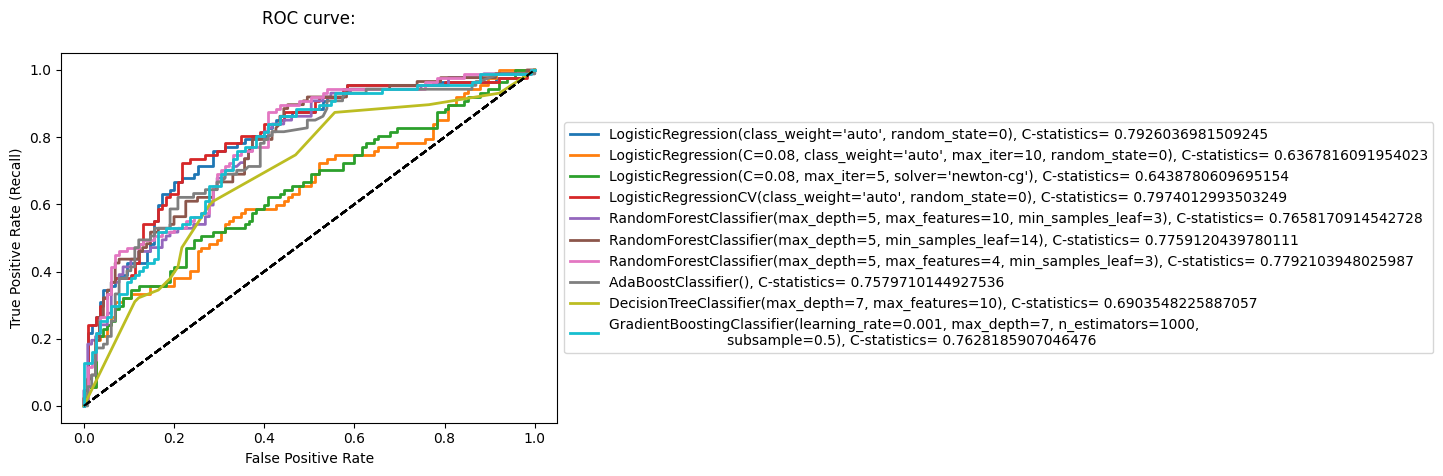

,Name,auc_score,roc_auc_score,r2_score,accuracy,precision,recall,f1
0,"LogisticRegression(class_weight='auto', random...",0.792604,0.727586,-0.070065,0.737624,0.712500,0.655172,0.682635
1,"LogisticRegression(C=0.08, class_weight='auto'...",0.636782,0.595552,-0.514243,0.628713,0.620000,0.356322,0.452555
2,"LogisticRegression(C=0.08, max_iter=5, solver=...",0.643878,0.611694,-0.413293,0.653465,0.729730,0.310345,0.435484
3,"LogisticRegressionCV(class_weight='auto', rand...",0.797401,0.724638,-0.090255,0.732673,0.698795,0.666667,0.682353
4,"RandomForestClassifier(max_depth=5, max_featur...",0.765817,0.691254,-0.251774,0.693069,0.634409,0.678161,0.655556
5,"RandomForestClassifier(max_depth=5, min_sample...",0.775912,0.678511,-0.271964,0.688119,0.646341,0.609195,0.627219
6,"RandomForestClassifier(max_depth=5, max_featur...",0.779210,0.653973,-0.372914,0.663366,0.614458,0.586207,0.600000
7,AdaBoostClassifier(),0.757971,0.687056,-0.251774,0.693069,0.643678,0.643678,0.643678
8,"DecisionTreeClassifier(max_depth=7, max_featur...",0.690355,0.659720,-0.352724,0.668317,0.619048,0.597701,0.608187
9,GradientBoostingClassifier(learning_rate=0.001...,0.762819,0.688456,-0.251774,0.693069,0.640449,0.655172,0.647727


In [39]:
# from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import average_precision_score, brier_score_loss, \
    log_loss, roc_auc_score
from sklearn.metrics import explained_variance_score, mean_absolute_error, \
    mean_squared_error, median_absolute_error, r2_score

def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr,tpr, linewidth = 2, label = label)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid()
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 0)
# fpr,t
# regression comparison
# Best: 0.752557 using {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'n_estimators': 100}

regression_list = [LogisticRegression(random_state= 0, class_weight="auto"),LogisticRegression(random_state= 0,C = 0.08, penalty ='l2',max_iter = 10, class_weight="auto",solver='lbfgs'),LogisticRegression(C= 0.08, penalty= 'l2', solver= 'newton-cg', max_iter = 5),LogisticRegressionCV(random_state= 0, class_weight="auto"),
                RandomForestClassifier(max_features=10, max_depth=5, min_samples_leaf=3),
                RandomForestClassifier(max_features='sqrt', max_depth=5, min_samples_leaf=14, n_estimators=100),
                RandomForestClassifier(max_features=4,n_estimators=100, max_depth=5, min_samples_leaf=3),AdaBoostClassifier(),DecisionTreeClassifier(max_depth=7, max_features=10),GradientBoostingClassifier(learning_rate= 0.001, max_depth= 7, n_estimators= 1000, subsample= 0.5)]
regscores = pd.DataFrame({'Name':[], 'auc_score':[], 'roc_auc_score':[],'r2_score':[],'accuracy':[], 'precision':[],'recall':[], 'f1':[]})
# regscores.loc[0] = ['b',3,4,1,2]
regscores
i =0 
for clf in regression_list:
    print('\n')
    print(clf)
    clf.fit(X_train,y_train)
    # try:
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, clf.predict_proba(X_val)[:,1])
    # except: 
    #     false_positive_rate, true_positive_rate, thresholds = (1,1,1)
    # plt.show()
    
    # display = PrecisionRecallDisplay.from_estimator(
    #     clf, X_val, y_val, name=str(clf)
    # )
    # _ = display.ax_.set_title("2-class Precision-Recall curve")

    auc_temp = auc(false_positive_rate, true_positive_rate)
    plot_roc_curve(false_positive_rate, true_positive_rate, label = str(clf) + ', C-statistics= '+ str(auc_temp))
    plt.title('ROC curve:\n')

    y_pred = clf.predict(X_val)
    rocauc_temp = roc_auc_score(y_val, y_pred)
    r2_temp = r2_score(y_val, y_pred)
    print(efron_rsquare(y_val, y_pred))
    # score_temp = clf.score(X_val, y_pred)   
    score_temp = accuracy_score(y_val, y_pred)
    # clf.score()
    print('area under the curve:',auc_temp)
    print('receiving operating characteristic auc score:',rocauc_temp)
    print('r2 score:',r2_temp)
    print('general accuracy:', score_temp)

    cmatrix_temp = confusion_matrix(y_val, y_pred=y_pred)
    print('confusion matrix:\n', cmatrix_temp)
    prec_temp = precision_score(y_val, y_pred)
    recall_temp = recall_score(y_val, y_pred)
    f1_temp = f1_score(y_val, y_pred)
    print('precision:',prec_temp, 'recall:',recall_temp, 'f1(harmonic mean):',f1_temp)
    m_names = [
    'average_precision_score', 'brier_score_loss',
    'log_loss', 'roc_auc_score',
    'explained_variance_score', 'mean_absolute_error',
    'mean_squared_error', 'median_absolute_error', 'r2_score'
    ]
    metrics = [average_precision_score, brier_score_loss, log_loss, roc_auc_score,
            explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score]
    for n, m in zip(m_names, metrics):
        print('{:.5f} : {}'.format(m(y_val, y_pred), n))
    regscores.loc[i] = [str(clf),auc_temp,rocauc_temp,r2_temp,score_temp,prec_temp,recall_temp,f1_temp]
    i+=1
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
# plt.legend()
regscores

0.56812 : average_precision_score
0.30693 : brier_score_loss
10.60114 : log_loss
0.68846 : roc_auc_score
0.30693 : mean_absolute_error
0.30693 : mean_squared_error
0.00000 : median_absolute_error
0.56812 : average_precision_score
0.30693 : brier_score_loss
10.60114 : log_loss
0.68846 : roc_auc_score
0.30693 : mean_absolute_error
0.30693 : mean_squared_error
0.00000 : median_absolute_error
0.56812 : average_precision_score
0.30693 : brier_score_loss
10.60114 : log_loss
0.68846 : roc_auc_score
0.30693 : mean_absolute_error
0.30693 : mean_squared_error
0.00000 : median_absolute_error
0.56812 : average_precision_score
0.30693 : brier_score_loss
10.60114 : log_loss
0.68846 : roc_auc_score
0.30693 : mean_absolute_error
0.30693 : mean_squared_error
0.00000 : median_absolute_error
0.56812 : average_precision_score
0.30693 : brier_score_loss
10.60114 : log_loss
0.68846 : roc_auc_score
0.30693 : mean_absolute_error
0.30693 : mean_squared_error
0.00000 : median_absolute_error
0.56812 : average_pr

,Name,average_precision_score,brier_score_loss,log_loss,roc_auc_score,mean_absolute_error,mean_squared_error,median_absolute_error
0,"LogisticRegression(class_weight='auto', random...",0.56812,0.306931,10.601137,0.688456,0.306931,0.306931,0.0
1,"LogisticRegression(C=0.08, class_weight='auto'...",0.56812,0.306931,10.601137,0.688456,0.306931,0.306931,0.0
2,"LogisticRegression(C=0.08, max_iter=5, solver=...",0.56812,0.306931,10.601137,0.688456,0.306931,0.306931,0.0
3,"LogisticRegressionCV(class_weight='auto', rand...",0.56812,0.306931,10.601137,0.688456,0.306931,0.306931,0.0
4,"RandomForestClassifier(max_depth=5, max_featur...",0.56812,0.306931,10.601137,0.688456,0.306931,0.306931,0.0
5,"RandomForestClassifier(max_depth=5, min_sample...",0.56812,0.306931,10.601137,0.688456,0.306931,0.306931,0.0
6,"RandomForestClassifier(max_depth=5, max_featur...",0.56812,0.306931,10.601137,0.688456,0.306931,0.306931,0.0
7,AdaBoostClassifier(),0.56812,0.306931,10.601137,0.688456,0.306931,0.306931,0.0
8,"DecisionTreeClassifier(max_depth=7, max_featur...",0.56812,0.306931,10.601137,0.688456,0.306931,0.306931,0.0
9,GradientBoostingClassifier(learning_rate=0.001...,0.56812,0.306931,10.601137,0.688456,0.306931,0.306931,0.0


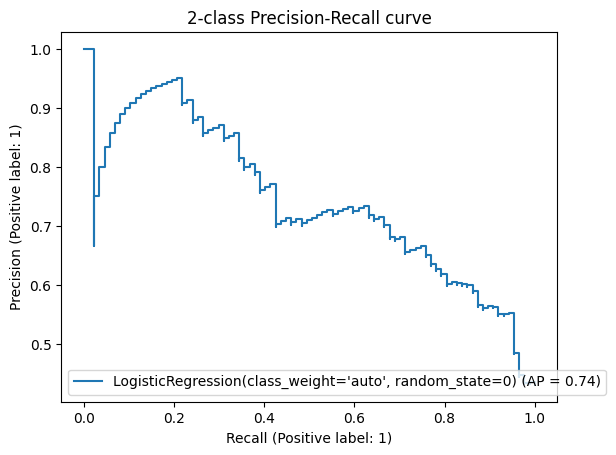

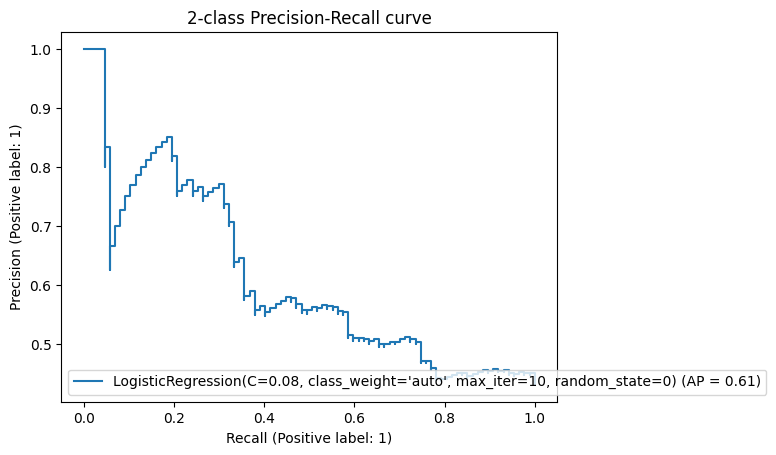

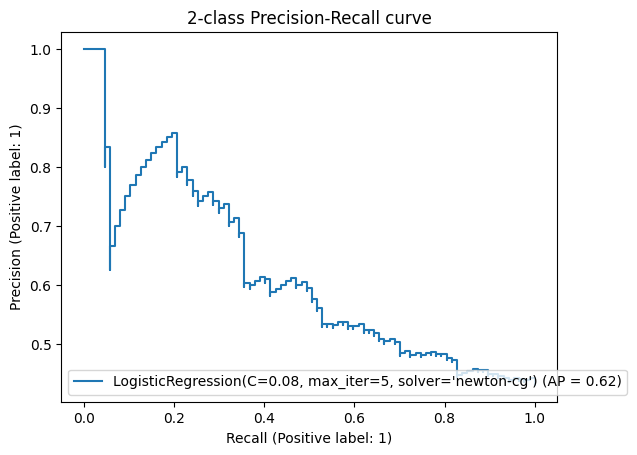

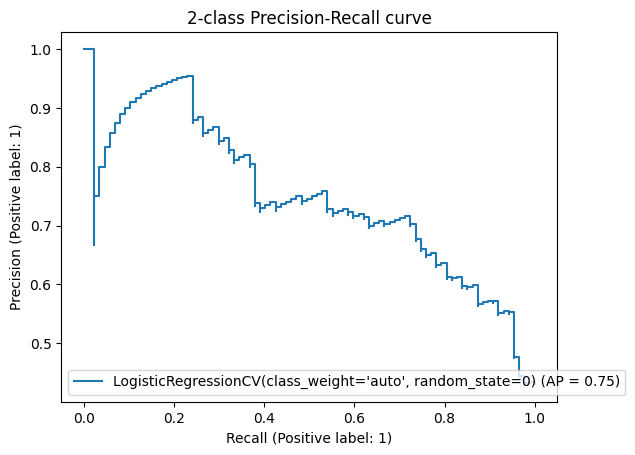

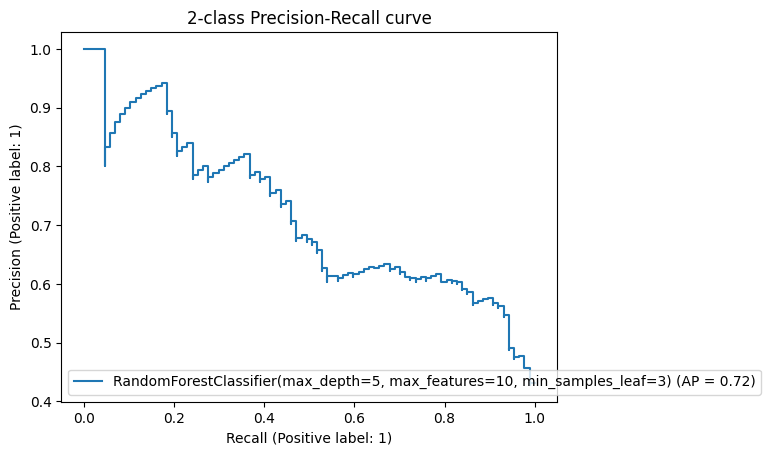

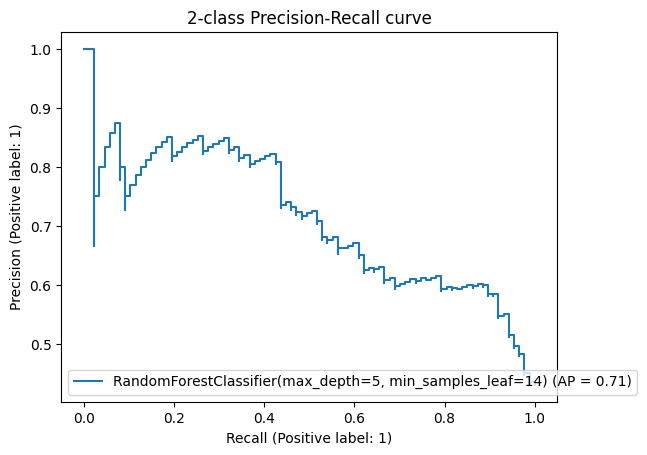

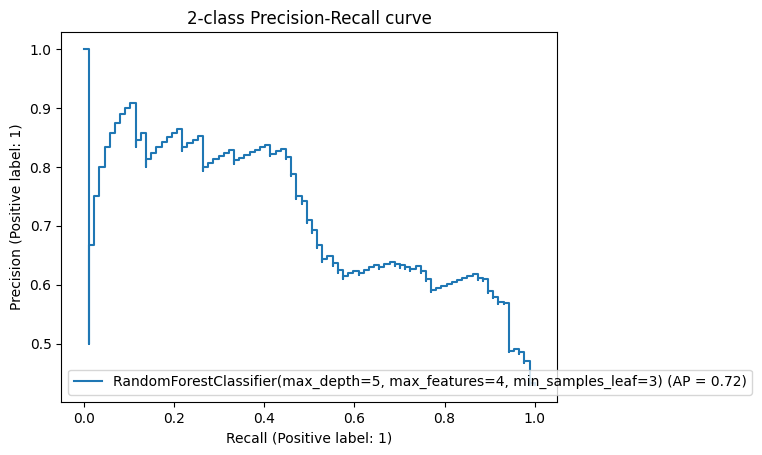

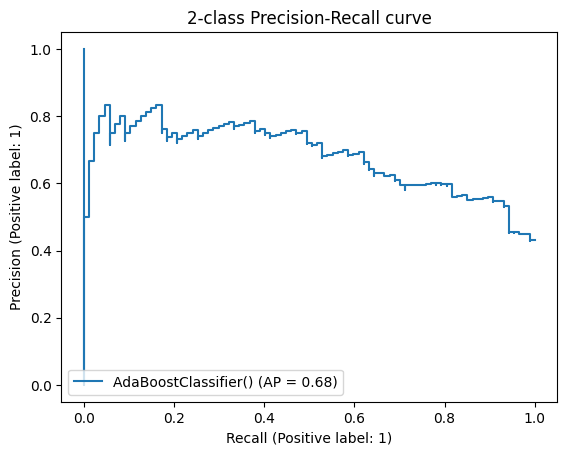

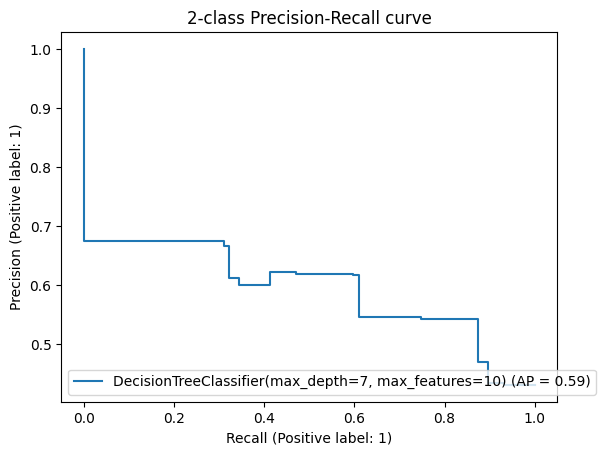

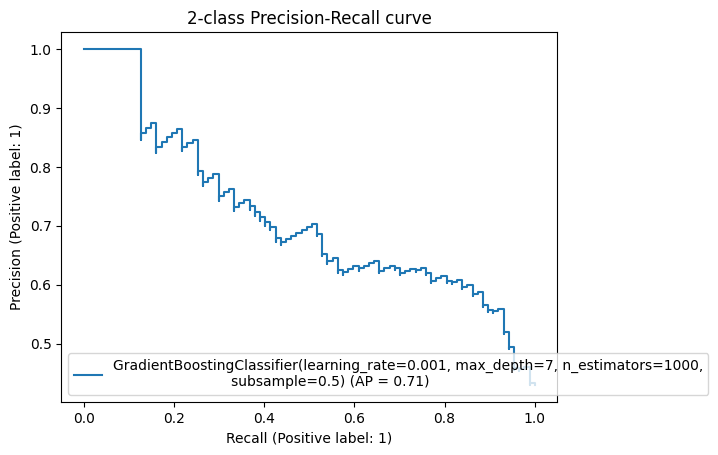

In [40]:
regscores_more = pd.DataFrame({'Name':[],'average_precision_score':[], 'brier_score_loss':[], 'log_loss':[], 'roc_auc_score':[],
            'mean_absolute_error':[], 'mean_squared_error':[], 'median_absolute_error':[]})
i = 0
for clf in regression_list:
    display = PrecisionRecallDisplay.from_estimator(
        clf, X_val, y_val, name=str(clf)
    )
    m_names = [
    'average_precision_score', 'brier_score_loss',
    'log_loss', 'roc_auc_score',
    'mean_absolute_error',
    'mean_squared_error', 'median_absolute_error'
    ]
    metrics = [average_precision_score, brier_score_loss, log_loss, roc_auc_score,
            mean_absolute_error, mean_squared_error, median_absolute_error]
    to_regscore = []        
    for n, m in zip(m_names, metrics):
        print('{:.5f} : {}'.format(m(y_val, y_pred), n))
        to_regscore.append(m(y_val,y_pred))
    # to_regscore = [m(y_val,y_pred) for m in metrics]

    regscores_more.loc[i] = [str(clf)] + to_regscore
    i+=1
    _ = display.ax_.set_title("2-class Precision-Recall curve")

regscores_more

In [41]:
AdaBoostClassifier(n_estimators = 50,learning_rate=1,algorithm= 'SAMME.R')


AdaBoostClassifier(learning_rate=1)

In [42]:
np.mean([sum(summ_feed_joined[summ_feed_joined.OPIOID_HARMED == 1].agg('mean')),sum(summ_feed_joined[summ_feed_joined.OPIOID_HARMED == 0].agg('mean'))])
X.shape
sum(np.ones(30) *0.4)
sum(X[0]), y[0]
summ_feed_joined.iloc[0]
sfcols = list(summ_feed_joined.columns)
sfcols.remove('OPIOID_HARMED')
(summ_feed_joined[summ_feed_joined.OPIOID_HARMED == 1].agg('mean'))-(summ_feed_joined[summ_feed_joined.OPIOID_HARMED == 0].agg('mean'))
sfcols
# sfcols

/tmp/ipykernel_20434/1690649617.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.mean([sum(summ_feed_joined[summ_feed_joined.OPIOID_HARMED == 1].agg('mean')),sum(summ_feed_joined[summ_feed_joined.OPIOID_HARMED == 0].agg('mean'))])
/tmp/ipykernel_20434/1690649617.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  (summ_feed_joined[summ_feed_joined.OPIOID_HARMED == 1].agg('mean'))-(summ_feed_joined[summ_feed_joined.OPIOID_HARMED == 0].agg('mean'))


['DESYNPUF_ID',
 'BENE_SEX_IDENT_CD',
 'BENE_AGE',
 'BENE_RACE_CD',
 'BENE_ESRD_IND',
 'BENE_HI_CVRAGE_TOT_MONS',
 'BENE_SMI_CVRAGE_TOT_MONS',
 'BENE_HMO_CVRAGE_TOT_MONS',
 'PLAN_CVRG_MOS_NUM',
 'SP_ALZHDMTA',
 'SP_CHF',
 'SP_CHRNKIDN',
 'SP_CNCR',
 'SP_COPD',
 'SP_DEPRESSN',
 'SP_DIABETES',
 'SP_ISCHMCHT',
 'SP_OSTEOPRS',
 'SP_RA_OA',
 'SP_STRKETIA',
 'ICD_28521',
 'ICD_58881',
 'ICD_5990',
 'ICD_2809',
 'ICD_3051',
 'ICD_311',
 'ICD_5859',
 'ICD_5849',
 'ICD_5856',
 'ICD_27651',
 'TOTAL_PAY_AMT']

In [43]:
summ_feed_joined

,DESYNPUF_ID,OPIOID_HARMED,BENE_SEX_IDENT_CD,BENE_AGE,BENE_RACE_CD,BENE_ESRD_IND,BENE_HI_CVRAGE_TOT_MONS,BENE_SMI_CVRAGE_TOT_MONS,BENE_HMO_CVRAGE_TOT_MONS,PLAN_CVRG_MOS_NUM,SP_ALZHDMTA,SP_CHF,SP_CHRNKIDN,SP_CNCR,SP_COPD,SP_DEPRESSN,SP_DIABETES,SP_ISCHMCHT,SP_OSTEOPRS,SP_RA_OA,SP_STRKETIA,ICD_28521,ICD_58881,ICD_5990,ICD_2809,ICD_3051,ICD_311,ICD_5859,ICD_5849,ICD_5856,ICD_27651,TOTAL_PAY_AMT
0,3951A55F8A5682D3,1,1,46,1,0,12,12,0,12,1,0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,300.0
1,39898ACF8B8DF7BB,1,2,99,1,0,12,12,0,12,0,0,0,0,0,1,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0
2,7C7CF7C730043552,1,2,34,1,0,3,3,0,3,0,1,0,0,0,0,0,0,1,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,270.0
3,800C1A2D55B31C97,1,2,72,3,0,12,12,0,12,1,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,370.0
4,804A02EA8F3AEF6B,1,1,49,1,0,12,12,0,12,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,570.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,E5753493DCDF3532,0,2,36,2,0,12,12,12,12,1,1,1,0,0,1,1,1,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-220.0
804,ED1CC041280181ED,0,1,85,1,0,12,12,0,0,1,1,0,0,1,1,1,1,0,1,1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7966.0
805,EF0E074B9F7625A4,0,1,67,1,0,12,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,440.0
806,F3B93FD9C345F93A,0,2,55,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
['DESYNPUF_ID',
 'BENE_SEX_IDENT_CD',
 'BENE_RACE_CD',
 'BENE_ESRD_IND',
 'SP_ALZHDMTA',
 'SP_CHF',
 'SP_CHRNKIDN',
 'SP_CNCR',
 'SP_COPD',
 'SP_DEPRESSN',
 'SP_DIABETES',
 'SP_ISCHMCHT',
 'SP_OSTEOPRS',
 'SP_RA_OA',
 'SP_STRKETIA',
 'ICD_28521',
 'ICD_58881',
 'ICD_5990',
 'ICD_2809',
 'ICD_3051',
 'ICD_311',
 'ICD_5859',
 'ICD_5849',
 'ICD_5856',
 'ICD_27651']

['DESYNPUF_ID',
 'BENE_SEX_IDENT_CD',
 'BENE_RACE_CD',
 'BENE_ESRD_IND',
 'SP_ALZHDMTA',
 'SP_CHF',
 'SP_CHRNKIDN',
 'SP_CNCR',
 'SP_COPD',
 'SP_DEPRESSN',
 'SP_DIABETES',
 'SP_ISCHMCHT',
 'SP_OSTEOPRS',
 'SP_RA_OA',
 'SP_STRKETIA',
 'ICD_28521',
 'ICD_58881',
 'ICD_5990',
 'ICD_2809',
 'ICD_3051',
 'ICD_311',
 'ICD_5859',
 'ICD_5849',
 'ICD_5856',
 'ICD_27651']

In [45]:
with np.printoptions(threshold=np.inf):
    print(X)

[[ 1.00000e+00  4.60000e+01  1.00000e+00  0.00000e+00  1.20000e+01
   1.20000e+01  0.00000e+00  1.20000e+01  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  1.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  3.00000e+02]
 [ 2.00000e+00  9.90000e+01  1.00000e+00  0.00000e+00  1.20000e+01
   1.20000e+01  0.00000e+00  1.20000e+01  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  3.70000e+02]
 [ 2.00000e+00  3.40000e+01  1.00000e+00  0.00000e+00  3.00000e+00
   3.00000e+00  0.00000e+00  3.00000e+00  0.00000e+00  0.00000e+00
   1.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  2.70000e+02]
 [ 2.00000e+00  7.20000e+01  3.00000e+00  0.00000e+00  1.20000e+01
   1.20000e+01  0.00000e+00  1.20000e+01  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00  0.00000e+00
   0.00000e+00  0.00000e+00  0.

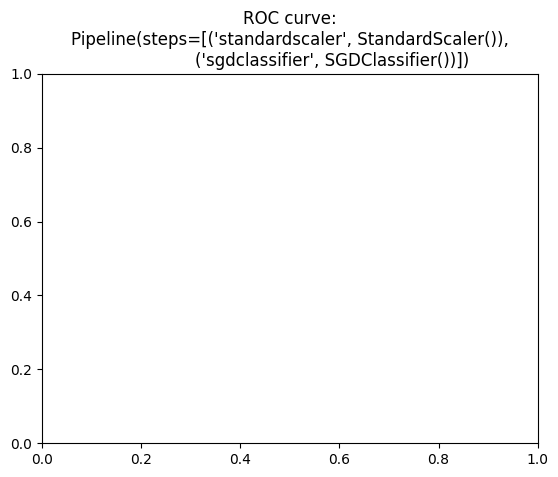

area under the curve: 0.7628185907046476
receiving operating characteristic auc score: 0.63968015992004
r2 score: -0.4132933533233383
general accuracy: 0.6534653465346535
confusion matrix:
 [[85 30]
 [40 47]]
precision: 0.6103896103896104 recall: 0.5402298850574713 f1(harmonic mean): 0.573170731707317


In [46]:
from sklearn.preprocessing import StandardScaler
# Or better yet: use a pipeline!
from sklearn.pipeline import make_pipeline
clf = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000))
clf.fit(X_train, y_train)
# clf.predict(X_val), y_val
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_val, clf.predict_proba(X_val)[:,1])
# except: 
#     false_positive_rate, true_positive_rate, thresholds = (1,1,1)
# plot_roc_curve(false_positive_rate, true_positive_rate)
plt.title('ROC curve:\n'+ str(clf))
plt.show()
# auc_temp = auc(false_positive_rate, true_positive_rate)


y_pred = clf.predict(X_val)
rocauc_temp = roc_auc_score(y_val, y_pred)
r2_temp = r2_score(y_val, y_pred)
# score_temp = clf.score(X_val, y_pred)   
score_temp = accuracy_score(y_val, y_pred)
# clf.score()
print('area under the curve:',auc_temp)
print('receiving operating characteristic auc score:',rocauc_temp)
print('r2 score:',r2_temp)
print('general accuracy:', score_temp)

cmatrix_temp = confusion_matrix(y_val, y_pred=y_pred)
print('confusion matrix:\n', cmatrix_temp)
prec_temp = precision_score(y_val, y_pred)
recall_temp = recall_score(y_val, y_pred)
f1_temp = f1_score(y_val, y_pred)
print('precision:',prec_temp, 'recall:',recall_temp, 'f1(harmonic mean):',f1_temp)


In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


clf = LinearRegression()
clf.fit(X, y)

# clf.predict(X[:2,:])
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
# print('area under the curve:',auc(false_positive_rate, true_positive_rate))
# print('receiving operating characteristic auc score:',roc_auc_score(y, clf.predict(X)))
print('r2 score:',r2_score(y_train, clf.predict(X_train)))
score_temp = accuracy_score(y_val, y_pred)
print('general accuracy:', score_temp)


r2 score: 0.278912841284336
general accuracy: 0.6534653465346535


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
for _ in range(20):
    # data = np.random.normal(size=(200, 10))
    # X_train = data[:160, :-1]
    # X_test = data[160:, :-1]
    # y_train = data[:160, -1]
    # y_test = data[160:, -1]
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_val)
    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_val, y_test_pred)
    print(f"Train R2: {train_score:.3f}, Test R2: {test_score:.3f}")

Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226
Train R2: 0.285, Test R2: 0.226


In [49]:
# https://towardsdatascience.com/how-to-make-sgd-classifier-perform-as-well-as-logistic-regression-using-parfit-cc10bca2d3c4
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

n_features = X.shape[1]

# gradient boosted trees tend to do well on problems like this
reg = GradientBoostingRegressor(n_estimators=50, random_state=0)

In [50]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [0.1,0.08,0.06,0.04,0.02]
max_iter =[3, 5,7,10]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values ,max_iter = max_iter)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-pa

Best: 0.650983 using {'C': 0.02, 'max_iter': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.617613 (0.061867) with: {'C': 0.1, 'max_iter': 3, 'penalty': 'l2', 'solver': 'newton-cg'}
0.617613 (0.061867) with: {'C': 0.1, 'max_iter': 3, 'penalty': 'l2', 'solver': 'lbfgs'}
0.616373 (0.061658) with: {'C': 0.1, 'max_iter': 3, 'penalty': 'l2', 'solver': 'liblinear'}
0.619208 (0.041983) with: {'C': 0.1, 'max_iter': 5, 'penalty': 'l2', 'solver': 'newton-cg'}
0.617202 (0.061497) with: {'C': 0.1, 'max_iter': 5, 'penalty': 'l2', 'solver': 'lbfgs'}
0.632449 (0.056379) with: {'C': 0.1, 'max_iter': 5, 'penalty': 'l2', 'solver': 'liblinear'}
0.627083 (0.048099) with: {'C': 0.1, 'max_iter': 7, 'penalty': 'l2', 'solver': 'newton-cg'}
0.620082 (0.064065) with: {'C': 0.1, 'max_iter': 7, 'penalty': 'l2', 'solver': 'lbfgs'}
0.612613 (0.042189) with: {'C': 0.1, 'max_iter': 7, 'penalty': 'l2', 'solver': 'liblinear'}
0.650159 (0.040151) with: {'C': 0.1, 'max_iter': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [51]:
# https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/
# example of grid searching key hyperparameters for GradientBoostingClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# define dataset
# X, y = make_blobs(n_samples=1000, centers=2, n_features=100, cluster_std=20)
# define models and parameters
model = GradientBoostingClassifier()
n_estimators = [200,300,400]
learning_rate = [0.005, 0.01,0.015]
subsample = [0.5, 0.7, 1.0]
max_depth = [4,6,8]
# define grid search
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.745952 using {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5}
0.740607 (0.059571) with: {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.5}
0.737731 (0.061136) with: {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 200, 'subsample': 0.7}
0.727382 (0.059712) with: {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}
0.745134 (0.062471) with: {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.5}
0.745129 (0.059647) with: {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.7}
0.733981 (0.054937) with: {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 300, 'subsample': 1.0}
0.745540 (0.057239) with: {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 400, 'subsample': 0.5}
0.744311 (0.059422) with: {'learning_rate': 0.005, 'max_depth': 4, 'n_estimators': 400, 'subsample': 0.7}
0.744316 (0.053262) with: {'learning_rate': 0.005, '

In [52]:
# example of grid searching key hyperparameters for RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define models and parameters
model = RandomForestClassifier()
n_estimators = [4,10,100]
max_features = ['sqrt', 4, 10]
max_depth = [3,5,7,10]
max_depth = [5]
min_samples_leaf = [12,13,14,15]
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features, max_depth = max_depth, min_samples_leaf=min_samples_leaf)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.753786 using {'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 12, 'n_estimators': 100}
0.721590 (0.059233) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 4}
0.738925 (0.051062) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 10}
0.749660 (0.057856) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 12, 'n_estimators': 100}
0.729830 (0.061913) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 13, 'n_estimators': 4}
0.735664 (0.067126) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 13, 'n_estimators': 10}
0.748848 (0.052984) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 13, 'n_estimators': 100}
0.718287 (0.048672) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'n_estimators': 4}
0.740550 (0.053616) with: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 14, 'n_estimators': 10}
0.752546 (0

In [53]:
clf = AdaBoostClassifier()
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))
clf.score(X,y)

0.865801186485669
0.7824940891777937
0.1420757943342532


0.7871287128712872

In [54]:
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

my_base_model= SVR()
clf = AdaBoostRegressor(base_estimator=my_base_model)
clf.fit(X,y)

# false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
# print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))
clf.score(X,y)


0.6438228049706466
-0.17702187473134745


-0.17702187473134745

In [55]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))
clf.score(X,y)


0.8197307257810619
0.7375224549512011
-0.0075621485144234946


0.75

In [56]:
from sklearn.ensemble import GradientBoostingClassifier 
clf = GradientBoostingClassifier()
clf.fit(X, y)

# clf.predict(X[:2,:])
false_positive_rate, true_positive_rate, thresholds = roc_curve(y, clf.predict_proba(X)[:,1])
print(auc(false_positive_rate, true_positive_rate))
print(roc_auc_score(y, clf.predict(X)))
print(r2_score(y, clf.predict(X)))
clf.score(X,y)

0.9276317820125809
0.8328055262329389
0.3415930514658222


0.8366336633663366

In [57]:
import math

math.sqrt(.5)


0.7071067811865476

In [58]:
clf.predict_proba(X)

array([[0.34589858, 0.65410142],
       [0.56222063, 0.43777937],
       [0.2108475 , 0.7891525 ],
       ...,
       [0.91052997, 0.08947003],
       [0.94781225, 0.05218775],
       [0.71146974, 0.28853026]])

In [59]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [60]:
clf.predict(X)


array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,

In [61]:

# clf.predict_proba(X)

clf.score(X,y)

0.8366336633663366

In [62]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv = 5, random_state = 0).fit(X,y)
clf.predict(X)

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,

In [63]:
clf.score(X,y)

0.754950495049505

In [64]:

# Counter(summ_op_joined['BENE_HI_CVRAGE_TOT_MONS']),Counter(summ_op_joined['BENE_HMO_CVRAGE_TOT_MONS']),Counter(summ_op_joined['BENE_HMO_CVRAGE_TOT_MONS'])
# Counter(list(x if str(x) != 'nan' else 2010 for x in summ_op_joined['BENE_DEATH_DT']))
# print('MEDREIMB_%s'%x)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [66]:
# from sklearn.inspection import DecisionBoundaryDisplay
clf = LogisticRegressionCV()
clf.fit(X,y)


/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

LogisticRegressionCV()

In [67]:
clf.score(X,y)

0.754950495049505

In [68]:
from sklearn.metrics import r2_score

In [69]:
clf = LogisticRegressionCV().fit(X,y)
r2_score(clf.predict(X), y)

/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/N/u/hanjos/Carbonate/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

0.0026370420243504444

In [70]:
inp_op_grouped.ICD_ALL


0      [34839, 5715, 2724, 2859, 7262, E9352, 5849, 4...
1      [430, 51884, 49121, 1618, 25000, E9320, 4538, ...
2      [9694, 2396, 4359, V5789, 311, 1510, 41401, V5...
3      [42781, 71535, 42731, 40490, 2768, 92411, 496,...
4      [486, 7850, 30000, 28860, 79902, 2724, 71596, ...
                             ...                        
326    [49391, 5849, 51881, 3899, 5990, 496, 2762, V1...
327    [78097.0, 486.0, 29660.0, 486.0, 51884.0, 3052...
328    [9694, 72210, 41400, 7140, 96509, 53081, E9802...
329    [25080, 2769, 9172, 30560, 2536, 5959, 4019, 2...
330    [V5789, 4280, 4019, 28521, E9352, 34830, 311, ...
Name: ICD_ALL, Length: 331, dtype: object

In [71]:
# inp_op[ ]